In [133]:
## loading checkpoint files

%load_ext autoreload
%autoreload 2

from bin.graphs import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [162]:
trainset = "S9full"

if trainset=="S8full":
    doshaping = True
    # == 1) Load pickle checkpoint
    jobname = "S8full_2019-10-10_09-45-18"
    exptdir = "2019-10-10T09:45:23.421494"
    checkpoint = "draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=720_HR=0.5_it=6_MF=5_noConsolidation=False_pc=10_RT=1800_RR=False_RW=False_solver=ocaml_STM=True_L=1_TRR=default_K=2_topkNotMAP=False_trainset=S8full_graph=True.pickle"
    taskset = "S8full"
elif trainset == "S9full":
    doshaping = True
    # == 1) Load pickle checkpoint
    jobname = "S9full_2019-10-10_09-45-29"
    exptdir = "2019-10-10T09:45:47.447037"
    checkpoint = "draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=720_HR=0.5_it=6_MF=5_noConsolidation=False_pc=10_RT=1800_RR=False_RW=False_solver=ocaml_STM=True_L=1_TRR=default_K=2_topkNotMAP=False_trainset=S9full_graph=True.pickle"
    taskset = "S9full"
elif trainset== "S8fixedprim":
    jobname = "S8fixedprim_2019-10-10_18-23-41"
    exptdir = "2019-10-10T18:24:59.632316"
    checkpoint = "draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=1800_HR=0.5_it=6_MF=5_noConsolidation=False_pc=10_RT=2000_RR=False_RW=False_solver=ocaml_STM=True_L=1_TRR=default_K=2_topkNotMAP=False_trainset=S8full_graph=True.pickle"
    taskset = "S8full"
elif trainset=="S9fixedprim":
    jobname = "S9fixedprim_2019-10-10_18-23-19"
    exptdir = "2019-10-10T18:24:13.326352"
    checkpoint = "draw_aic=1.0_arity=3_BO=True_CO=True_doshaping=True_ES=1_ET=1800_HR=0.5_it=5_MF=5_noConsolidation=False_pc=10_RT=2000_RR=False_RW=False_solver=ocaml_STM=True_L=1_TRR=default_K=2_topkNotMAP=False_trainset=S9full_graph=True.pickle"
    taskset = "S9full"
    
    

f = "experimentOutputs/draw/{}/{}".format(exptdir, checkpoint)
result = loadfun(f)

# == 2) Load tasks
from dreamcoder.domains.draw.makeDrawTasks import makeSupervisedTasks
tasks = makeSupervisedTasks(trainset=taskset, doshaping=True)[0]

print("Num dreamcoder tasks {}".format(len(result.taskSolutions)))
print("n supervised tasks {}".format(len(tasks)))
assert len(result.taskSolutions)==len(tasks)


# === 4) Load tools to work with tasks libraries
import dreamcoder.domains.draw.primitives as P

DRAW TASK training set: S9full
DO SHAPING: True
INCLUDING SHAPING STIMULI
Num dreamcoder tasks 86
n supervised tasks 83


AssertionError: 

In [ ]:
# ################## DISPLAY ALL TASKS AND SOLUTIONS
# ===== print all task solutions
plt.close()
for i, t in enumerate(tasks):
    plt.figure(figsize=(15,3))

    # 1) Plot this ground truth program
    ax = plt.subplot(1,6,1)
    P.plotOnAxes(t.strokes, ax)
    print("--- TASK {}".format(i))
    
    # 2) best posterior
    

    # 3) Plot frontiers solutions:    
    nfront = len(result.allFrontiers[t])
    if nfront>0:
        ll = result.allFrontiers[t].bestPosterior.logLikelihood
        plt.title("TASK {}, ll={}".format(i, ll))
        for ii, f in enumerate(result.allFrontiers[t]):
            ax = plt.subplot(1,6,ii+2)
            P.plotOnAxes(f.program.evaluate([]), ax)
#             plt.title(f.program.betaNormalForm())
            print(f.program.betaNormalForm())
    else:
        print("No frontiers")

In [142]:
# ====== plot a specific frontiers programs
tasknum =9
for f in result.allFrontiers[tasks[tasknum]]:
    print(f)
    print('--')

FrontierEntry(program=(#(lambda (repeat (#(lambda (transform line (transmat (Some scale7) (Some angle2) $0 (Some dist1) None))) (Some dist2)) $0 (transmat None None (Some dist9) None None))) rep0), logPrior=-4.547691794088907, logLikelihood=0.0
--
FrontierEntry(program=(#(lambda (transform line (transmat (Some scale7) (Some angle2) $0 (Some dist1) None))) (Some dist2)), logPrior=-6.69994934907035, logLikelihood=0.0
--
FrontierEntry(program=(transform (#(lambda (repeat (#(lambda (transform line (transmat (Some scale7) (Some angle2) $0 (Some dist1) None))) (Some dist2)) $0 (transmat None None (Some dist9) None None))) rep0) (transmat None None None None None)), logPrior=-8.95320664295351, logLikelihood=0.0
--
FrontierEntry(program=(reflect (#(lambda (repeat (#(lambda (transform line (transmat (Some scale7) (Some angle2) $0 (Some dist1) None))) (Some dist2)) $0 (transmat None None (Some dist9) None None))) rep0) angle0), logPrior=-9.671704647080666, logLikelihood=0.0
--
FrontierEntry(prog

#(lambda (reflect $0 angle0))
<function Abstraction.evaluate.<locals>.<lambda> at 0x1c37c34598>
cant plot
----
#(lambda (#(lambda (lambda (#(lambda (transform (connect (#(lambda (transform line (transmat (Some scale7) (Some angle2) None $0 None))) (Some dist1)) $0))) (connect #(transform circle (#(lambda (transmat None None None (Some $0) None)) dist3)) $0) $1))) (#(lambda (transmat None None None (Some $0) None)) $0) (#(lambda (#(lambda (lambda (lambda (connect (#(lambda (transform line (transmat (Some scale7) (Some angle2) None $0 None))) (Some $0)) (transform $1 (transmat None None (Some dist4) (Some $2) None)))))) dist9 (repeat line $0 (#(lambda (transmat None None None (Some $0) None)) dist3)) dist1)) rep1)))
<function Abstraction.evaluate.<locals>.<lambda> at 0x1c3fad6c80>
cant plot
----
#(#(lambda (connect (#(lambda (lambda (transform (#(lambda (lambda (lambda (connect (#(lambda (transform line (transmat (Some scale7) (Some angle2) None $0 None))) (Some $0)) (transform $1 (trans

----
circle
[array([[ 5.00000000e-01,  0.00000000e+00],
       [ 4.88310278e-01,  1.07485220e-01],
       [ 4.53787710e-01,  2.09944551e-01],
       [ 3.98046533e-01,  3.02587108e-01],
       [ 3.23693142e-01,  3.81081028e-01],
       [ 2.34204220e-01,  4.41756022e-01],
       [ 1.33764169e-01,  4.81774996e-01],
       [ 2.70694543e-02,  4.99266707e-01],
       [-8.08909983e-02,  4.93413261e-01],
       [-1.85069078e-01,  4.64488360e-01],
       [-2.80593533e-01,  4.13844499e-01],
       [-3.62997746e-01,  3.43849729e-01],
       [-4.28428588e-01,  2.57776929e-01],
       [-4.73826586e-01,  1.59650765e-01],
       [-4.97068979e-01,  5.40595092e-02],
       [-4.97068979e-01, -5.40595092e-02],
       [-4.73826586e-01, -1.59650765e-01],
       [-4.28428588e-01, -2.57776929e-01],
       [-3.62997746e-01, -3.43849729e-01],
       [-2.80593533e-01, -4.13844499e-01],
       [-1.85069078e-01, -4.64488360e-01],
       [-8.08909983e-02, -4.93413261e-01],
       [ 2.70694543e-02, -4.99266707e-01]

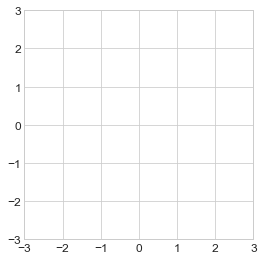

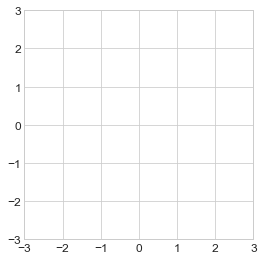

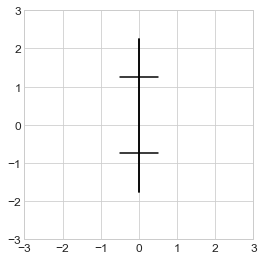

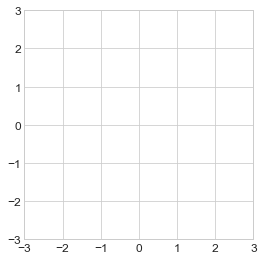

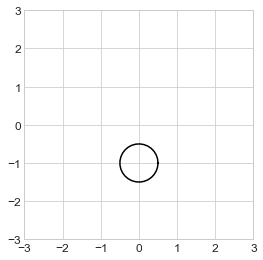

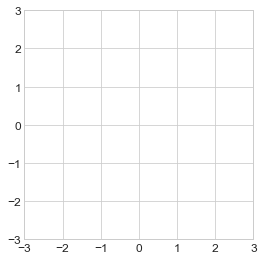

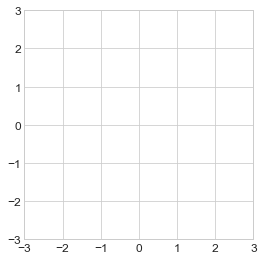

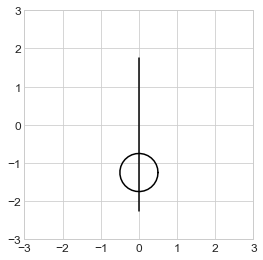

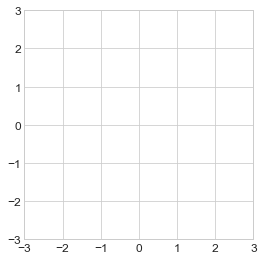

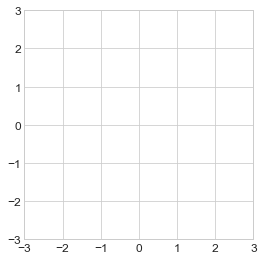

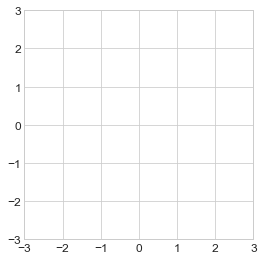

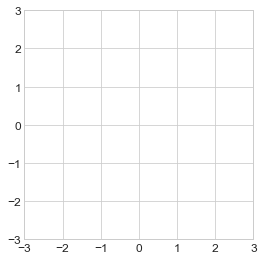

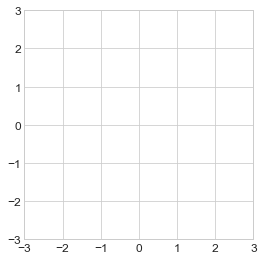

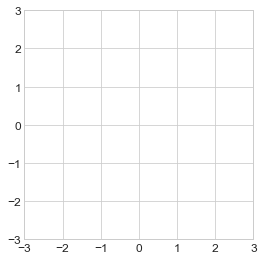

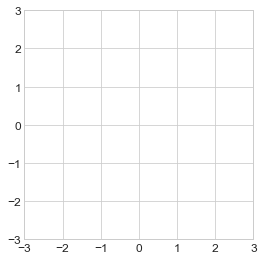

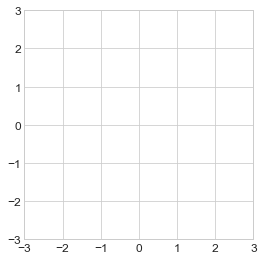

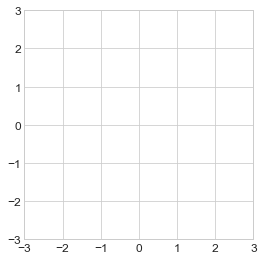

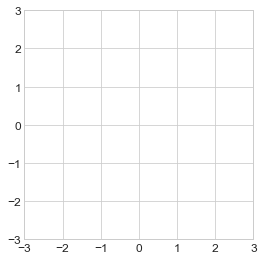

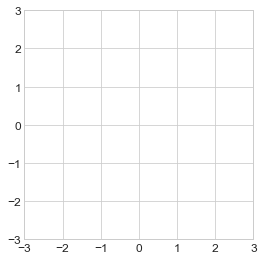

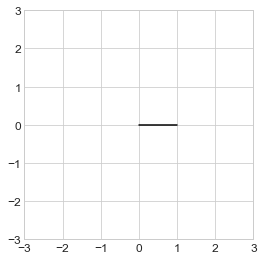

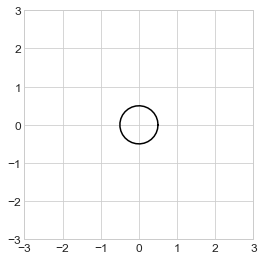

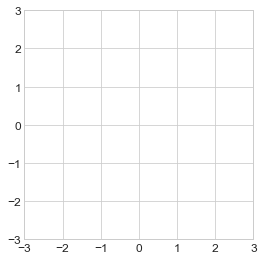

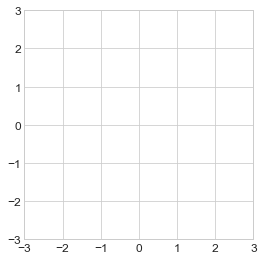

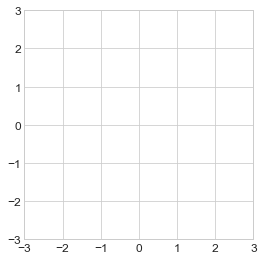

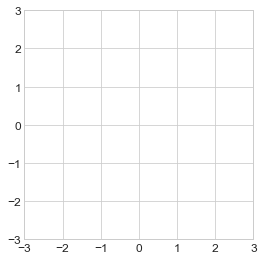

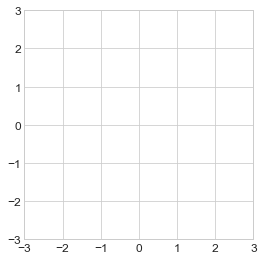

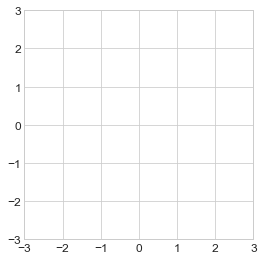

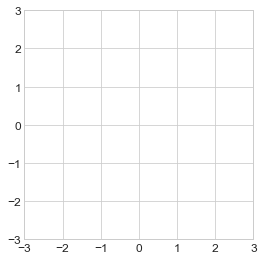

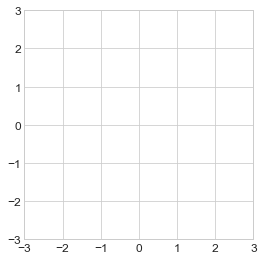

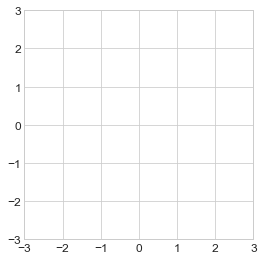

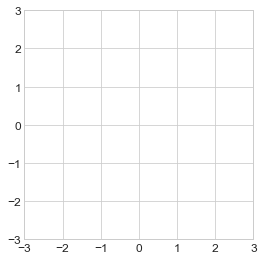

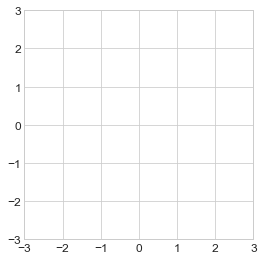

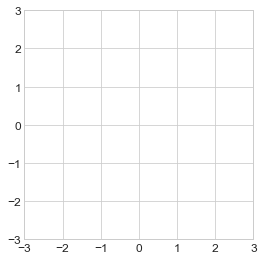

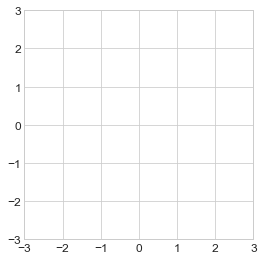

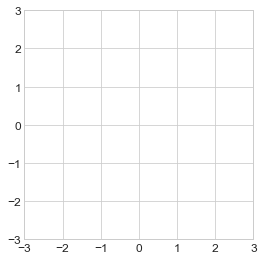

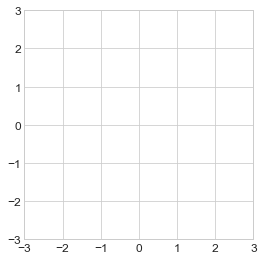

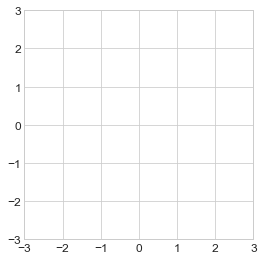

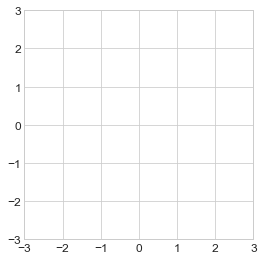

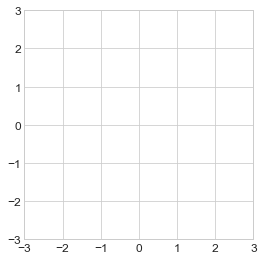

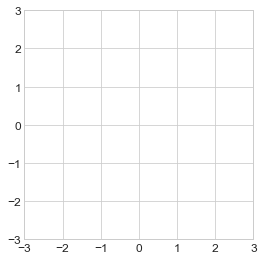

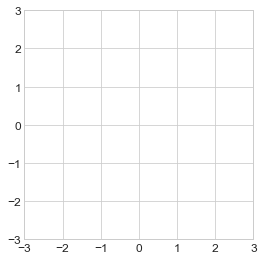

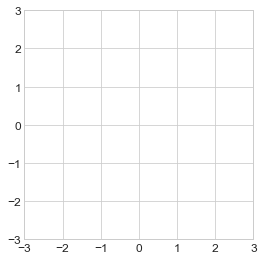

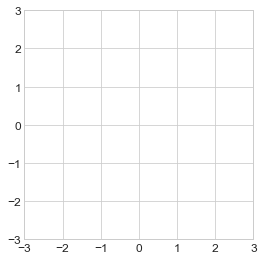

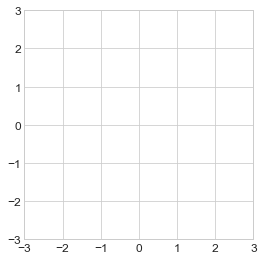

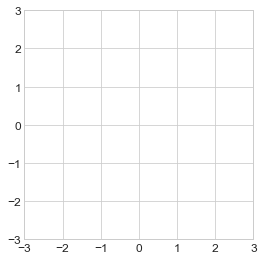

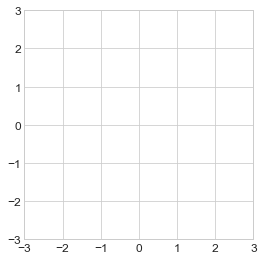

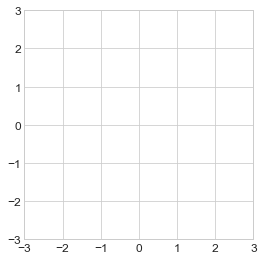

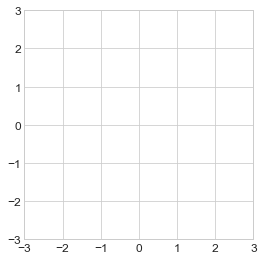

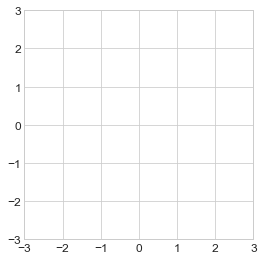

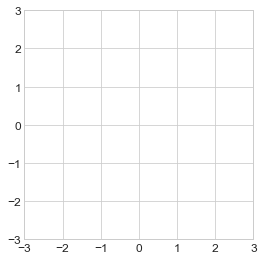

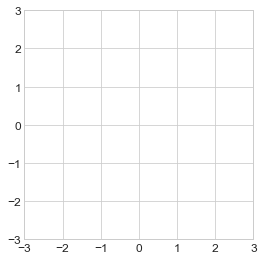

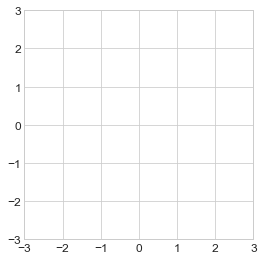

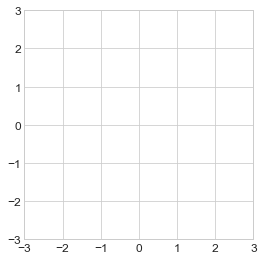

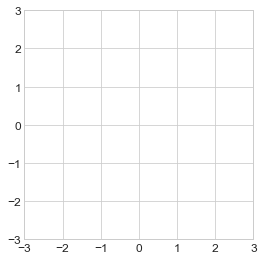

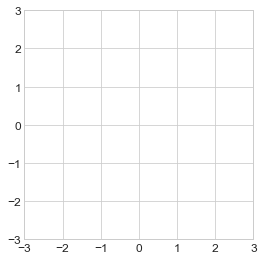

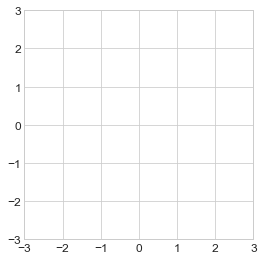

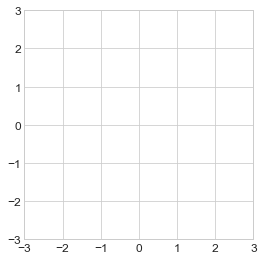

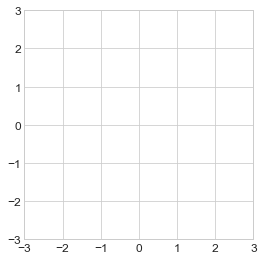

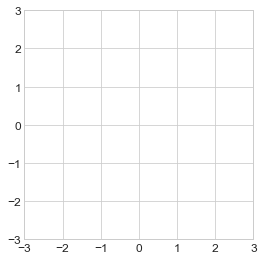

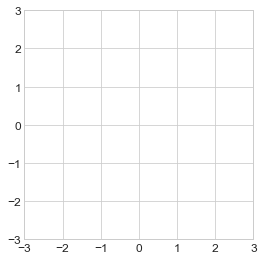

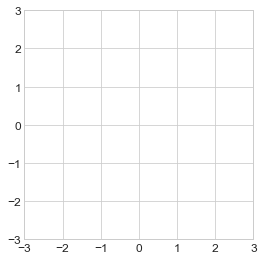

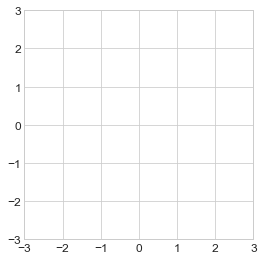

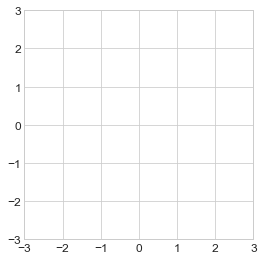

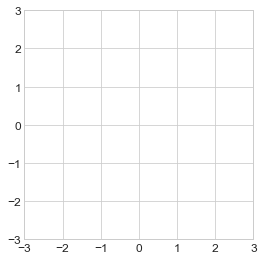

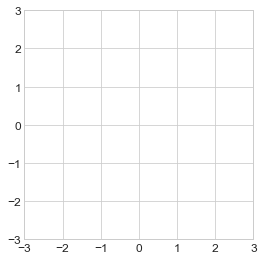

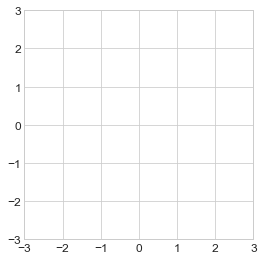

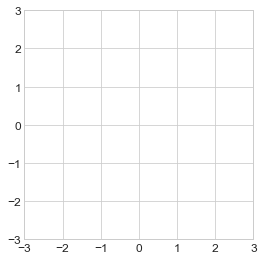

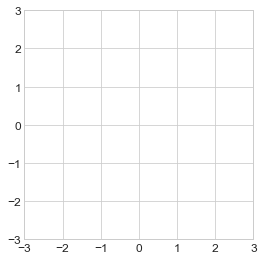

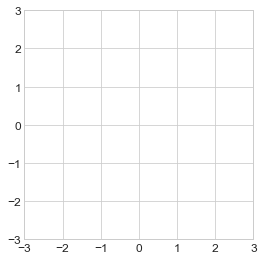

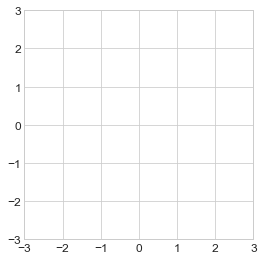

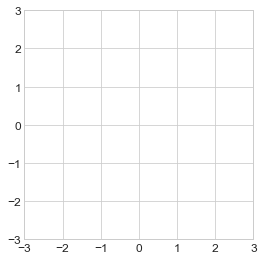

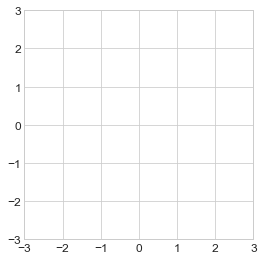

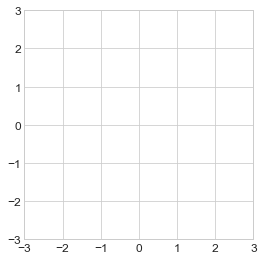

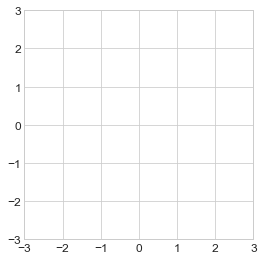

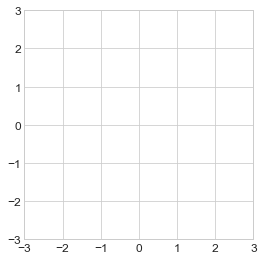

In [146]:
for p in result.grammars[-1].primitives:
    print(p)
    print(p.evaluate([]))
    try:
        
        P.plot(p.evaluate([]))
    except:
        print("cant plot")
    print('----')

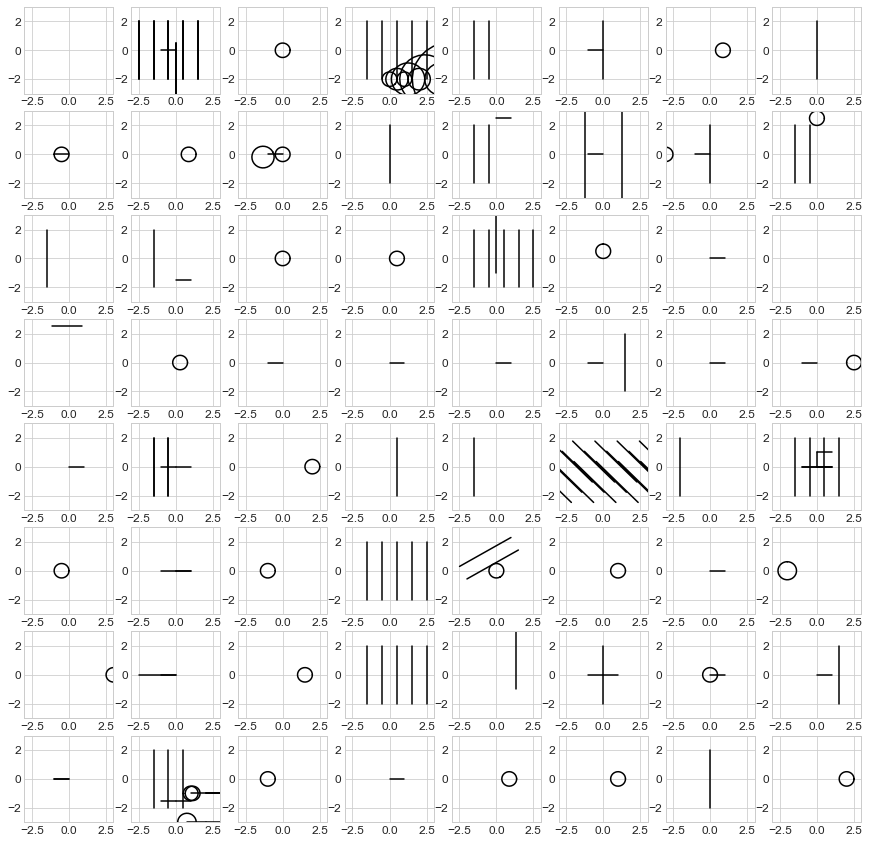

In [156]:
# ====== DREAM FROM LEARNED GRAMMAR
from dreamcoder.domains.draw.main import dreamFromGrammar

dreams = dreamFromGrammar(result.grammars[-1], N=64)

plt.figure(figsize=(15, 15))
for i, d in enumerate(dreams):
    ax = plt.subplot(8,8,i+1)
    P.plotOnAxes(d.evaluate([]), ax)

In [ ]:
# === TOOLS to analyze/plot dreamcoder programs
from dreamcoder.domains.draw.makeDrawTasks import makeSupervisedTasks
tasks = makeSupervisedTasks(trainset=trainset, doshaping=True)

assert result.taskSolutions==len(tasks)


# === 3) Load tools to to things with tasks/programs
datflat = []
datflat.append({
    "trialstrokes":strokes,
    "trialonset": 0,
    "stimname": "test",
    "trialprimitives":[],
    "trialcircleparams":[],
    "condition":[],
})


# ==== do segmentation
import sys
sys.path.append("/Users/lucastian/tenen/TENENBAUM/drawgood/experiments")
from segmentation import *
from utils import *


# PLOT
getSegmentation(datflat)

from plotsDatFlat import *
from plotsSingleSubj import *
from segmentation import *

plotDrawingAndTimecourse(datflat[0])


In [125]:
list(result.allFrontiers[tasks[8]])

[FrontierEntry(program=#(repeat (#(lambda (transform line (transmat None $0 None (Some dist0) None))) (Some angle2)) rep3 (transmat None None None (Some dist8) None)), logPrior=-2.883850317439259, logLikelihood=0.0,
 FrontierEntry(program=(reflect #(repeat (#(lambda (transform line (transmat None $0 None (Some dist0) None))) (Some angle2)) rep3 (transmat None None None (Some dist8) None)) angle4), logPrior=-7.519560953406131, logLikelihood=0.0,
 FrontierEntry(program=(reflect #(repeat (#(lambda (transform line (transmat None $0 None (Some dist0) None))) (Some angle2)) rep3 (transmat None None None (Some dist8) None)) angle2), logPrior=-7.83812587986904, logLikelihood=0.0,
 FrontierEntry(program=(reflect #(repeat (#(lambda (transform line (transmat None $0 None (Some dist0) None))) (Some angle2)) rep3 (transmat None None None (Some dist8) None)) angle0), logPrior=-7.901931741388596, logLikelihood=0.0,
 FrontierEntry(program=(reflect #(repeat (#(lambda (transform line (transmat None $0 N

In [112]:
result.taskSolutions[tasks[0]]
result.allFrontiers[tasks[5]].bestPosterior.program.betaNormalForm()
# print(result.allFrontiers[tasks[0]].bestPosterior.program.parseHumanReadable())


(transform line (transmat None None (Some dist8) None None))

In [322]:
result.allFrontiers[tasks[5]].bestPosterior.program.evaluate([])

[array([[2., 0.],
        [3., 0.]])]

In [155]:
from dreamcoder.domains.draw.main import dreamFromGrammar

dreams = dreamFromGrammar(N=10)
for d in dreams:
    print(d)
    print('--')

(repeat circle rep2 (transmat None (Some angle5) None (Some dist8) None))
--
circle
--
(reflect (reflect (transform (transform (connect (transform (transform (transform line (transmat (Some scale5) None (Some dist14) None None)) (transmat None (Some angle2) None (Some dist7) (Some tsr))) (transmat (Some scale6) (Some angle6) None None (Some trs))) circle) (transmat (Some scale4) None (Some dist17) (Some dist17) (Some rst))) (transmat None None None None None)) angle7) angle6)
--
line
--
(transform circle (transmat (Some scale3) (Some angle5) (Some dist6) (Some dist14) None))
--
(connect (repeat (reflect line angle7) rep1 (transmat None None None (Some dist7) None)) line)
--
(repeat (repeat (reflect (repeat (reflect (transform (repeat (repeat line rep6 (transmat None None (Some dist13) None (Some rst))) rep3 (transmat (Some scale2) None None (Some dist4) None)) (transmat (Some scale3) (Some angle8) (Some dist12) (Some dist14) (Some srt))) angle5) rep1 (transmat (Some scale3) None None (

In [182]:
print(dreams[4])
for i in dreams[4].walk():
    print(i)
    
# (reflect (repeat line rep0 (transmat None None None (Some dist4) (Some trs))) angle4)

(transform (reflect (connect circle circle) angle4) (transmat (Some scale0) (Some angle6) None None (Some rts)))
(0, (transform (reflect (connect circle circle) angle4) (transmat (Some scale0) (Some angle6) None None (Some rts))))
(0, (transform (reflect (connect circle circle) angle4)))
(0, transform)
(0, (reflect (connect circle circle) angle4))
(0, (reflect (connect circle circle)))
(0, reflect)
(0, (connect circle circle))
(0, (connect circle))
(0, connect)
(0, circle)
(0, circle)
(0, angle4)
(0, (transmat (Some scale0) (Some angle6) None None (Some rts)))
(0, (transmat (Some scale0) (Some angle6) None None))
(0, (transmat (Some scale0) (Some angle6) None))
(0, (transmat (Some scale0) (Some angle6)))
(0, (transmat (Some scale0)))
(0, transmat)
(0, (Some scale0))
(0, Some)
(0, scale0)
(0, (Some angle6))
(0, Some)
(0, angle6)
(0, None)
(0, None)
(0, (Some rts))
(0, Some)
(0, rts)


In [1]:
# === walk along the string. whenever you see a line or circle, keep note of its depth.
# === outputs list of primitives and thier depths
# === NOTE problem, this cannot deal with lets say want to connect(connect(p1, p2), p3) --> i.e,, making a new thing
# that is three primtiives. it will call these different depth (2,2,1). 
# === PROBLEM: doesn't get repeats yet - will only output one, even though repeating multiple times.
words = str(dreams[1].betaNormalForm()).split()
depth = 0
prim = []
depthlist = []
for w in words:
    
    if w.find("circle")>-1:
        prim.append("C")
        depthlist.append(depth)
    elif w.find("line")>-1:
        prim.append("L")
        depthlist.append(depth)
        
    print("depth {}: {}".format(depth, w))       
    if w.find("(")>-1:
        depth+=1
    elif w.find(")")>-1:
        depth-=1

print(prim)
print(depthlist)

NameError: name 'dreams' is not defined

In [325]:
# ==== given program convert into "strokes", so that can pass into same behavioral aalysis as for subjects
import numpy as np
def program2strokes(program):
    # program is list of numpy arrays
    # will put down times in order. will be in fake milliseconds. 
    
    on = 1
    off = 300
    strokes = []
    for p in program:
        times = np.linspace(on, off, p.shape[0])
        p = np.concatenate((p, times[:,None]), axis=1)
        on+=500
        off+=500
        strokes.append(p)
    return strokes
    
# strokes = program2strokes(dreams[1].evaluate([]))
strokes = program2strokes(result.allFrontiers[tasks[1]].bestPosterior.program.evaluate([]))
strokes = [s.tolist() for s in strokes]

In [291]:
dreams[1]

(transform (repeat (repeat (transform (reflect (reflect (repeat (reflect (reflect (reflect (repeat circle rep1 (transmat (Some scale0) (Some angle6) (Some dist9) None (Some trs))) angle4) angle0) angle5) rep6 (transmat None None (Some dist3) (Some dist6) None)) angle0) angle2) (transmat None (Some angle4) None (Some dist3) (Some rts))) rep5 (transmat None None None (Some dist11) (Some rts))) rep3 (transmat None None None None (Some rts))) (transmat (Some scale1) None None (Some dist8) None))

FAILED TO LOAD STIM .png file...


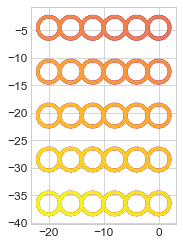

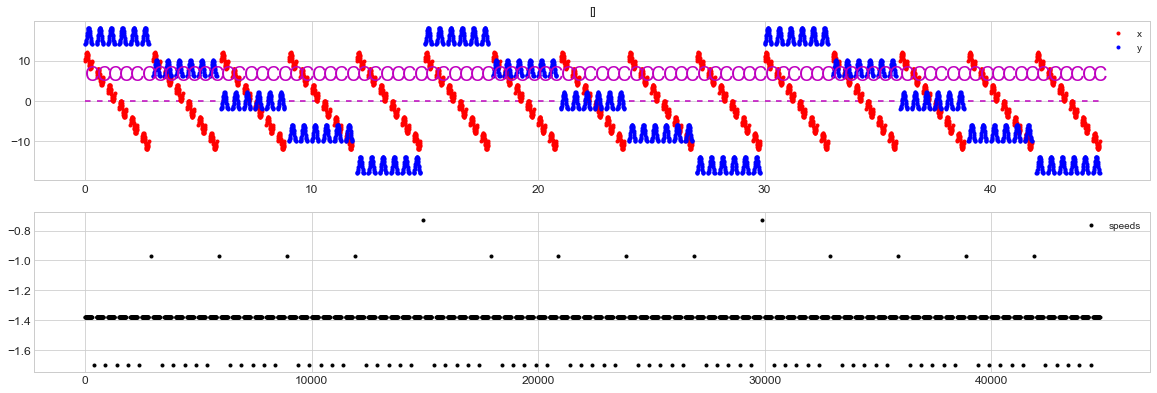

In [251]:
tmp = np.linspace(1, 50, 50)

tmp[-1,None]

print(tmp[:, None].shape)

(50, 1)


In [105]:
result.allFrontiers[tasks[0]].bestPosterior.program

(#(lambda (connect $0 line)) circle)

In [158]:
def reorderProgram():
    # given a program, output all the ways it could be ordered if allowed to permute within each level:
    

SyntaxError: unexpected EOF while parsing (<ipython-input-158-974a76825963>, line 1)

In [153]:
# ===== given some program and some behavioral sequence compute the likelihood
# === first thing, given some sequence, get edit distance from that sequence:
import pyxdameraulevenshtein as dl

# 1) get behavior in terms of circles and lines (each numnbered)
def segmentBehavior():
    # --- name circles and lines based on lica
    # -- first divide drawing into 4 vertical stripes
    
    return ["C1", "C2", "L1", "L2"]

def segmentProgram():
    return ["C1", "L1", "C2", "L2"]

def stringDist(a, b):
    # rerutns value between 0 and 1 (1 is max difference)
    # first map all the items to idx identifiers (e.g. from  ["C1", "C2", "L1", "L2"] to [1,2,3,4]
#     alphabet = ["C1", "C2", "L1", "L2"]
#     A = [alphabet.index(aa) for aa in a]
#     B = [alphabet.index(bb) for bb in b]
    
    return dl.normalized_damerau_levenshtein_distance(a,b)
    
    
    
stringDist(segmentBehavior(), segmentProgram())



0.25

In [151]:
import pyxdameraulevenshtein as dl

dl.damerau_levenshtein_distance(["C2", "C0", "L1", "L2"], ["C9", "LLL", "C", "L"])


4

loaded path: experimentOutputs/draw/2019-10-01T02:19:27.116528/draw_aic=1.0_arity=3_ET=1800_it=6_MF=5_noConsolidation=False_pc=10_RW=False_solver=python_STM=True_L=1_TRR=default_K=2_topkNotMAP=False_rec=False.pickle
Of the 1 checkpoints that you gave me, here is a matrix showing the overlap between the tasks solved:
	ck1
ck1	15%	
Of the 1 checkpoints that you gave me, here is a matrix showing the overlap between the tasks solved:
	ck1
ck1	15%	


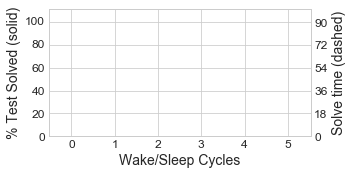

In [12]:
resultPaths=[f]
plotECResult(resultPaths)
showSynergyMatrix([result])